In [47]:
from src import utils, modularity_utils
import pandas as pd


In [66]:
%autoreload 2

In [49]:
movies_data = pd.read_csv("./movies/movies/movies.csv")
movies_data

,ID,Title,IMDB_id,ReleaseDate,Characters,Edges
0,1,10 Things I Hate About You,tt0147800,1999,21,68
1,2,12,tt0488478,2007,33,61
2,3,Twelve and Holding,tt0417385,2005,25,47
3,5,127 Hours,tt1542344,2010,9,10
4,6,1492: Conquest of Paradise,tt0103594,1992,34,86
...,...,...,...,...,...,...
768,910,Yes Man,tt1068680,2008,50,132
769,911,You Can Count on Me,tt0203230,2000,16,39
770,912,You've Got Mail,tt0128853,1998,38,96
771,913,Youth in Revolt,tt0403702,2009,42,129


In [50]:
input_movie_title = movies_data.loc[movies_data['ID'] == int(87), 'Title'].values[0]
input_movie_title

'Autumn in New York'

In [51]:
table_data = []
table_columns = ['ID', 'Title', 'Characters', 'Edges', 'Communities', 'Modularity']

# Create a DataFrame to store the results
for index, row in movies_data.iterrows():
    
    id = row['ID']
    print(f"Processing {id}...")    
    name = row['Title']
    num_nodes = row['Characters']
    num_edges = row['Edges']
    nodes_df, edges_df = utils.get_network_dataframe(id)
    
    print(f'nodes columns: {nodes_df.columns}')
    print(f'edges columns: {edges_df.columns}')
    G = utils.create_graph_from_dataframes(nodes_df, edges_df)
    communities, community_data = utils.compute_louvain_communities(G, edges_df)
    print(f"Number of communities: {community_data['n_communities']}")
    print(f"Modularity: {community_data['modularity_score']:.4f}")

    num_communities = community_data['n_communities']
    modularity_score = community_data['modularity_score']
    # Create a new row with the data
    row = (id, name, num_nodes, num_edges, num_communities, modularity_score)
    table_data.append(row)
    print(row)

# Create a DataFrame from the list of rows
table_df = pd.DataFrame(table_data, columns=table_columns)
table_df

Processing 1...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.1571
Number of communities: 3
Modularity: 0.1571
(1, '10 Things I Hate About You', 21, 68, 3, 0.15711505190311417)
Processing 2...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.4471
Number of communities: 4
Modularity: 0.4471
(2, '12', 33, 61, 4, 0.4470572426766999)
Processing 3...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.4726
Number of communities: 3
Modularity: 0.4726
(3, 'Twelve and Holding', 25, 47, 3, 0.47261204164780446)
Processing 5...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns

,ID,Title,Characters,Edges,Communities,Modularity
0,1,10 Things I Hate About You,21,68,3,0.157115
1,2,12,33,61,4,0.447057
2,3,Twelve and Holding,25,47,3,0.472612
3,5,127 Hours,9,10,3,0.160000
4,6,1492: Conquest of Paradise,34,86,5,0.349716
...,...,...,...,...,...,...
768,910,Yes Man,50,132,5,0.334280
769,911,You Can Count on Me,16,39,3,0.246220
770,912,You've Got Mail,38,96,5,0.379286
771,913,Youth in Revolt,42,129,4,0.275014


In [52]:
table_df.sort_values(by='Modularity', ascending=False, inplace=True)
table_df
top_6 = table_df.head(6)
top_6

,ID,Title,Characters,Edges,Communities,Modularity
74,92,Babel,71,154,6,0.690504
711,837,Traffic,68,131,4,0.668580
447,523,Magnolia,82,239,8,0.662979
342,402,Highlander,59,108,5,0.606953
328,386,He's Just Not That Into You,51,114,4,0.603339
88,110,Batman Returns,51,124,6,0.579572


Processing 92...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.6905
Number of communities: 6
Modularity: 0.6905


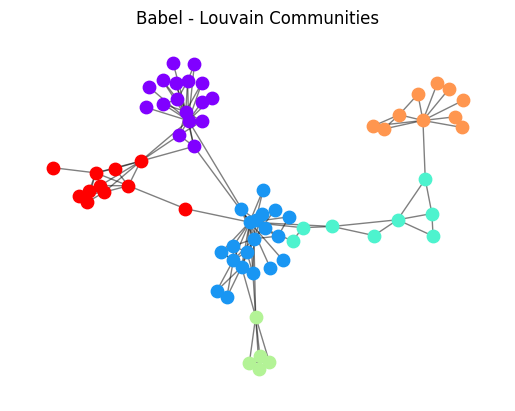

Processing 837...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.6686
Number of communities: 4
Modularity: 0.6686


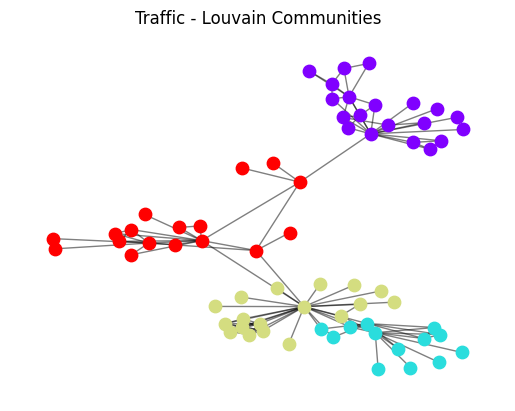

Processing 523...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.6630
Number of communities: 8
Modularity: 0.6630


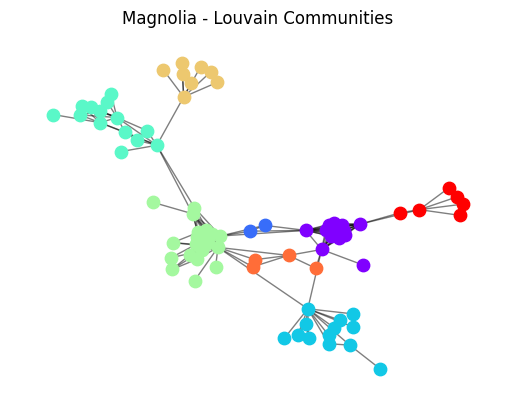

Processing 402...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.6070
Number of communities: 5
Modularity: 0.6070


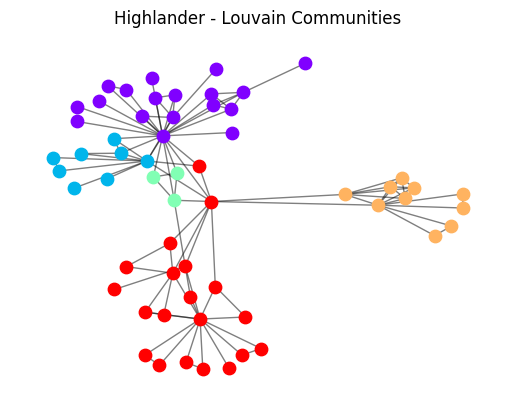

Processing 386...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.6033
Number of communities: 4
Modularity: 0.6033


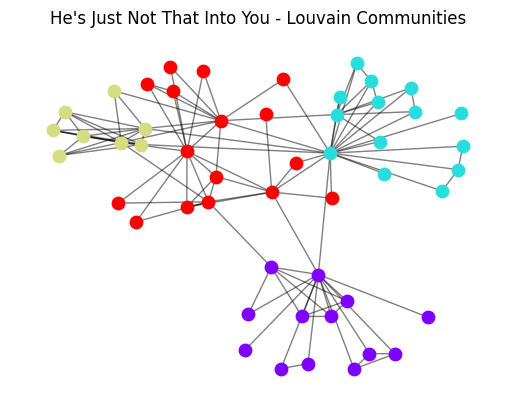

Processing 110...
im here
nodes columns: Index(['Id', 'Label'], dtype='object')
edges columns: Index(['Source', 'Target', 'Weight'], dtype='object')
Modularity using Louvain algorithm from NetworkX: 0.5796
Number of communities: 6
Modularity: 0.5796


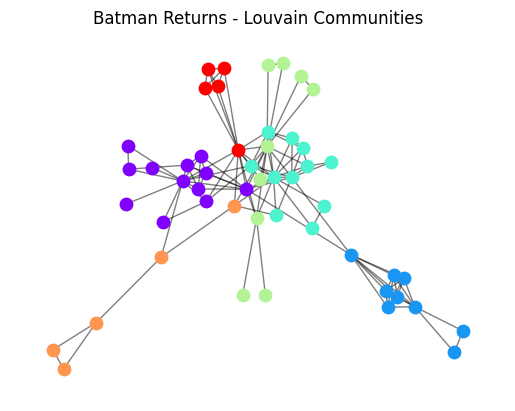

In [53]:
for index, row in top_6.iterrows():
    id = row['ID']
    print(f"Processing {id}...")    
    name = row['Title']
    num_nodes = row['Characters']
    num_edges = row['Edges']
    nodes_df, edges_df = utils.get_network_dataframe(id)
    
    print(f'nodes columns: {nodes_df.columns}')
    print(f'edges columns: {edges_df.columns}')
    G = utils.create_graph_from_dataframes(nodes_df, edges_df)
    communities, community_data = utils.compute_louvain_communities(G, edges_df)
    print(f"Number of communities: {community_data['n_communities']}")
    print(f"Modularity: {community_data['modularity_score']:.4f}")
    utils.visualize_communities(G, communities, name)

____________________

1. run Louvain Algorithm to find the best possible communities 
2. create a table showing: id of the dataset (movies.csv), name of the movie (movies.csv), number of nodes and edges (movies.csv), number of communities (runtime) found and modularity for those communities (runtime). 
3. Give a brief comment on which networks seem
to present community structure, and why

a- R: We approached the problem by applying the Louvain Algorithm to all the networks and sorting them by descending modularity. The top 6 modularity scores are for "Babel", "Traffic", "Magnolia", "Highlander", "He's Just Not That Into You" and "Batman Returns" ordered by higher modularity to lower. When analyzing the networks we can see community structure mainly for the 3 networks, since the nodes are clearly well connected and separated from the other clusters exposing the community structures. For the last 3 as the modularity decreases, harder is to notice the community structures. In these last cases we have more separated nodes without clear clustering or aggregation in general. In some cases there are clusters or defined communities but not at entire network level.

 (b) Choose any two of the movies (that are not di erent chapters of the same universe) and
 produce visualizations for the networks, labeling the nodes with their character names, using
 colors to represent communities and the size of the nodes to represent PageRank values. Try
 to make the picture as aesthetically pleasing as possible, reinforcing the community structure
 (and explain how you created the layout). Give a brief informal description on the meaning
 of the communities in the context of the movie (are they what you were expecting? are they
 meaningful? choose movies that you are familiar with and that you believe should have community
 structure).



b) R: For this task the network was constructed using the node labels, the pagerank value obtained by NetworkX.pagerank function, the colors for the nodes were determined using community ids generated by the Louvain Algorithm. We selected the films Avatar (88) - node degree 0.27 - and The Lord of Rings (512) - node degree 0.11.
For Avatar we can notice some understandable community aggregations in terms of colors, but they are not well separated. For example we have the scientists (Grace, Norm, Max...) aggregated in the same community. Jake is the central point of the history and have high betweenes in the network. He is classified in a separated community and makes sense because of his dynamic role in the history construction. The Na'vi characters (Tsu'Tey, Neytiri, Mo'At..) a are also aggregated in the same community. We don't have for any of these communities a clear community structure.
For Lord of the Rings network we also don't findclear community structure defined. However, in the communities we can notice the representation aggregations that are reflected in the film history. The hobbities are classified in the same community (Sam, Pippin, Frodo). They are closelly linked to Gandlaf, which belongs to same community of Galladriel. In other hand there is a aggregation of knights (Gimli, Aragorn, Legolas, Boromir) but having in the same community the Saruman. This community reflects some ambiguity and not clear definition. 

im here
Modularity using Louvain algorithm from NetworkX: 0.2718


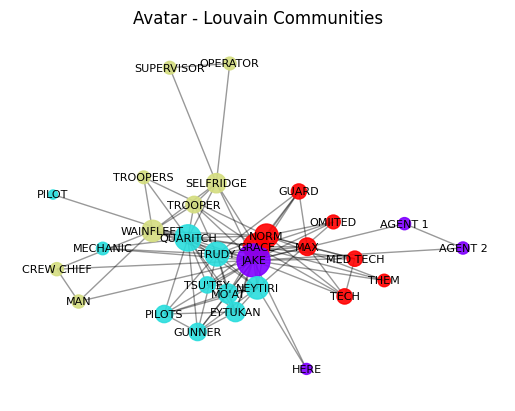

In [54]:
# 88,Avatar,tt0499549,2009,30,105
# 488,The Last Samurai,tt0325710,2003,20,54
# 512,The Lord of the Rings: The Fellowship of the Ring,tt0120737,2001,24,106


nodes_df, edges_df = utils.get_network_dataframe(88)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
communities, _ = utils.compute_louvain_communities(G, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, communities, title="Avatar", pagerank_scores=pagerank_scores)

im here
Modularity using Louvain algorithm from NetworkX: 0.1184


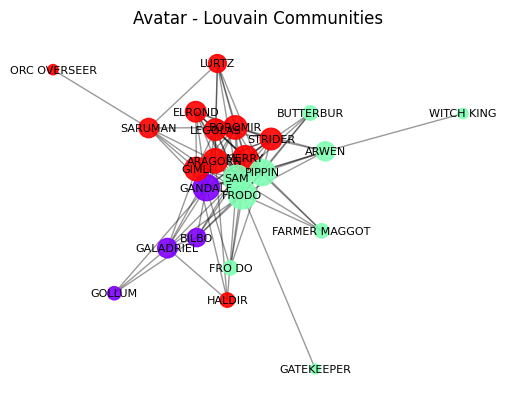

In [55]:

nodes_df, edges_df = utils.get_network_dataframe(512)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
communities, _ = utils.compute_louvain_communities(G, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, communities, title="Avatar", pagerank_scores=pagerank_scores)

c) Implement a program (in any programming language) for manually computing the (normal
ized) modularity of a network when given a partition. Test it on one movie of your choice
 and the on the partitions you produced on the previous questions (and report if the value seems
 ok). Attach the program to your homework submission with a very short description on how it
 works and how I could run it.

In [80]:
comm_2, progress_scores = modularity_utils.greedy_agglomerative(G)
nodes_df, edges_df = utils.get_network_dataframe(92)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, comm_2, title="Avatar", pagerank_scores=pagerank_scores)
modularity_local_implementation = sum(modularity_utils.get_intra_community_modularity(G, comm) for comm in comm_2)
print(f"Intra-community modularity: {modularity_local_implementation:.4f}")

Best merge found with increase: 0.0281
New modularity after merge: 0.0281
Number of communities: 70
Best merge found with increase: 0.0281
New modularity after merge: 0.0562
Number of communities: 69
Best merge found with increase: 0.0229
New modularity after merge: 0.0791
Number of communities: 68
Best merge found with increase: 0.0222
New modularity after merge: 0.1014
Number of communities: 67
Best merge found with increase: 0.0222
New modularity after merge: 0.1236
Number of communities: 66
Best merge found with increase: 0.0175
New modularity after merge: 0.1410
Number of communities: 65
Best merge found with increase: 0.0255
New modularity after merge: 0.1665
Number of communities: 64
Best merge found with increase: 0.0197
New modularity after merge: 0.1862
Number of communities: 63
Best merge found with increase: 0.0188
New modularity after merge: 0.2051
Number of communities: 62
Best merge found with increase: 0.0156
New modularity after merge: 0.2207
Number of communities: 61


FileNotFoundError: [Errno 2] No such file or directory: '../movies/movies/networks/92_nodes.csv'

[np.float64(0.028075984973918), np.float64(0.05620538019192081), np.float64(0.07913617831900159), np.float64(0.1013548398582848), np.float64(0.12357350139756806), np.float64(0.14103865121330272), np.float64(0.16653314105645464), np.float64(0.18624152112375153), np.float64(0.20507753387099648), np.float64(0.2206555217290676), np.float64(0.23464900567928929), np.float64(0.24791254962701845), np.float64(0.2598052306432374), np.float64(0.27011340775160675), np.float64(0.2831989175523865), np.float64(0.29822499955491466), np.float64(0.3075183820256725), np.float64(0.31679396108173546), np.float64(0.3306094108850077), np.float64(0.3396891523794264), np.float64(0.34786091972440314), np.float64(0.35532055048158234), np.float64(0.36318965977674517), np.float64(0.370773914436789), np.float64(0.38241734764727875), np.float64(0.3898413715750681), np.float64(0.3967847033060941), np.float64(0.40623831650910647), np.float64(0.41480175897737187), np.float64(0.4239349107158753), np.float64(0.4344567288

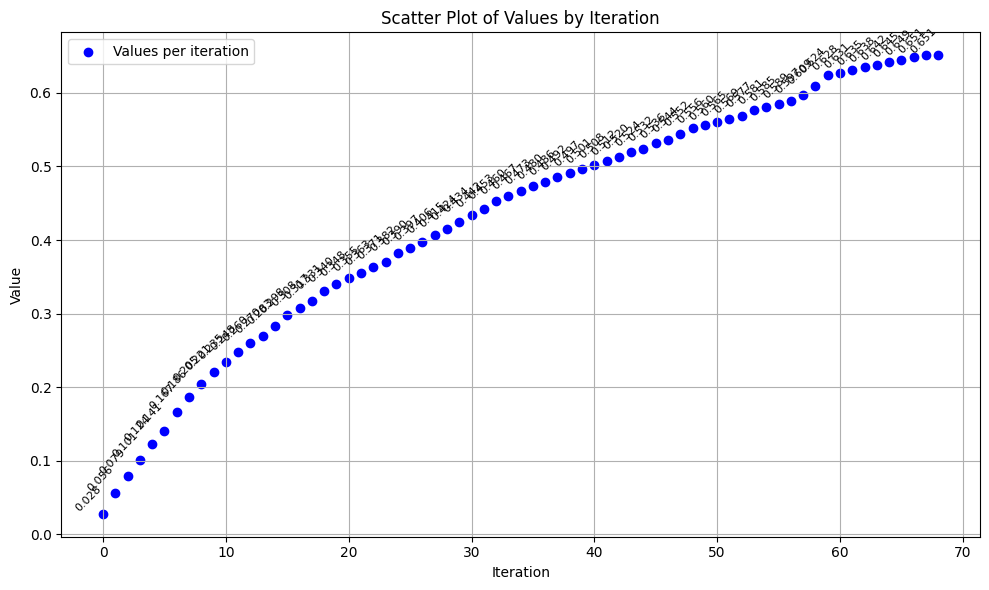

In [79]:

print(progress_scores)
# Create iteration index
iterations = list(range(len(progress_scores)))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(iterations, progress_scores, color='blue', label='Values per iteration')

# Add labels
for i, val in enumerate(progress_scores):
    plt.text(i, val, f"{val:.3f}", fontsize=8, ha='right', va='bottom', rotation=45)
    
plt.title('Scatter Plot of Values by Iteration')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

________________________________

d)  Implement (in any programming language) a simple greedy agglomerative algorithm: start
 with each node being a separated community and then do successive iterations in which you try
 all possible changes for one node (that is, for each node i V , try changing its community to all
 possible communities j C), and apply the change that produces the best gain in modularity (if
 there is ties, choose any possible). Attach the program to your homework submission with a very
 short description on how it works.
 Using one of the movies from from the previous questions, make a plot showing the modularity
 increase as you are making more iterations until you reach you a local maximum, and report the
 communities you found (as a visualization), comparing them to the communities found previously.

______

R: e) Since in the Louvain algorithm we have an agglomerative approach, we start with the each node of network being one community. As the iterations goes on, the communities are merged and the number of communities in the network reduces. To have larger quantity of communities we should do an early stop. In other hand, to have less communities we should do a late stop, ending with more communities merged (even without improve of modularity).